In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
pd.set_option('display.max_columns', None)


In [87]:
df=pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [88]:
df.shape

(17880, 18)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [90]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


### Missing Values

In [91]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [92]:
df['location']=np.where(df['location'].isnull(),"not_given_country",df['location'])

In [93]:
df['department']=np.where(df['department'].isnull(),"not_given_dept",df['department'])

In [94]:
df['salary_range']=np.where(df['salary_range'].isnull(),"not given",df['salary_range'])

In [95]:
df['company_profile_present']=np.where(df['company_profile'].isnull(),0,1)

In [96]:
df.drop('company_profile',axis=1,inplace=True)

In [97]:
df['description_present']=np.where(df['description'].isnull(),0,1)

In [98]:
df.drop('description',axis=1,inplace=True)

In [99]:
df['description_present'].value_counts()

1    17879
0        1
Name: description_present, dtype: int64

In [100]:
### Description is abesnt only for 1 record (almost constant column )we can drop "description_present" also
df.drop('description_present',axis=1,inplace=True)

In [101]:
df['requirements_present']=np.where(df['requirements'].isnull(),0,1)

In [102]:
df.drop('requirements',axis=1,inplace=True)

In [103]:
df['requirements_present'].value_counts()

1    15185
0     2695
Name: requirements_present, dtype: int64

In [104]:
df['benefits_present']=np.where(df['benefits'].isnull(),0,1)

In [105]:
df.drop('benefits',axis=1,inplace=True)

In [106]:
df['benefits_present'].value_counts()

1    10670
0     7210
Name: benefits_present, dtype: int64

In [107]:
df['employment_type']=np.where(df['employment_type'].isnull(),"not_given_emp_type",df['employment_type'])

In [108]:
df['required_experience']=np.where(df['required_experience'].isnull(),"not_given_exp",df['required_experience'])

In [109]:
df['required_education']=np.where(df['required_education'].isnull(),"Unspecified",df['required_education'])

In [110]:
df['industry']=np.where(df['industry'].isnull(),"not_given_industry",df['industry'])

In [111]:
df['function']=np.where(df['function'].isnull(),"not_given_function",df['function'])

### Categorical Features

In [112]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
not_given_country        346
                        ... 
GB, , Cheltenham           1
EG, C, Maad                1
US, WI, Mundelein          1
US, HI, HONOLULU           1
GB, , BARNSLEY             1
Name: location, Length: 3106, dtype: int64

In [113]:
df['location_country']=df['location'].map(lambda x:x.split(',')[0])

In [114]:
top_10_countries=df['location_country'].value_counts().sort_values(ascending=False).head(10).index

In [115]:
top_10_countries

Index(['US', 'GB', 'GR', 'CA', 'DE', 'not_given_country', 'NZ', 'IN', 'AU',
       'PH'],
      dtype='object')

In [116]:
for country in top_10_countries:
    df[country]=np.where(df['location_country']==country,1,0)

In [117]:
df['department'].value_counts()

not_given_dept       11547
Sales                  551
Engineering            487
Marketing              401
Operations             270
                     ...  
Finishing                1
Head Office              1
Media/ Television        1
Projects                 1
UI Production            1
Name: department, Length: 1338, dtype: int64

In [118]:
top_10_departments=df['department'].value_counts().sort_values(ascending=False).head(10).index

In [119]:
top_10_departments

Index(['not_given_dept', 'Sales', 'Engineering', 'Marketing', 'Operations',
       'IT', 'Development', 'Product', 'Information Technology', 'Design'],
      dtype='object')

In [120]:
for dep in top_10_departments:
    df[dep]=np.where(df['department']==dep,1,0)

In [121]:
df['salary_range'].value_counts()

not given      15012
0-0              142
40000-50000       66
30000-40000       55
45000-67000       37
               ...  
12500-14000        1
35-60              1
60-65              1
175-225            1
53000-67000        1
Name: salary_range, Length: 875, dtype: int64

In [122]:
df['salary_range']=np.where(df['salary_range']=='not given',0,1)

In [123]:
df.head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company_profile_present,requirements_present,benefits_present,location_country,US,GB,GR,CA,DE,not_given_country,NZ,IN,AU,PH,not_given_dept,Sales,Engineering,Marketing,Operations,IT,Development,Product,Information Technology,Design
0,1,Marketing Intern,"US, NY, New York",Marketing,0,0,1,0,Other,Internship,Unspecified,not_given_industry,Marketing,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,1,1,1,NZ,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not_given_dept,0,0,1,0,not_given_emp_type,not_given_exp,Unspecified,not_given_industry,not_given_function,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not_given_dept,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [124]:
df['employment_type'].value_counts()

Full-time             11620
not_given_emp_type     3471
Contract               1524
Part-time               797
Temporary               241
Other                   227
Name: employment_type, dtype: int64

In [125]:
emp_type=pd.get_dummies(df['employment_type'],drop_first=True)

In [126]:
emp_type

,Full-time,Other,Part-time,Temporary,not_given_emp_type
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
17875,1,0,0,0,0
17876,1,0,0,0,0
17877,1,0,0,0,0
17878,0,0,0,0,0


In [127]:
df['required_experience'].value_counts()

not_given_exp       7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [128]:
req_exp=pd.get_dummies(df['required_experience'],drop_first=True)

In [129]:
df['required_education'].value_counts()

Unspecified                          9502
Bachelor's Degree                    5145
High School or equivalent            2080
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [130]:
top_5_edu=df['required_education'].value_counts().sort_values(ascending=False).head(5).index

In [131]:
top_5_edu

Index(['Unspecified', 'Bachelor's Degree', 'High School or equivalent',
       'Master's Degree', 'Associate Degree'],
      dtype='object')

In [132]:
for edu in top_5_edu:
    df[edu]=np.where(df['required_education']==edu,1,0)

In [133]:
df.head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company_profile_present,requirements_present,benefits_present,location_country,US,GB,GR,CA,DE,not_given_country,NZ,IN,AU,PH,not_given_dept,Sales,Engineering,Marketing,Operations,IT,Development,Product,Information Technology,Design,Unspecified,Bachelor's Degree,High School or equivalent,Master's Degree,Associate Degree
0,1,Marketing Intern,"US, NY, New York",Marketing,0,0,1,0,Other,Internship,Unspecified,not_given_industry,Marketing,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,1,1,1,NZ,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not_given_dept,0,0,1,0,not_given_emp_type,not_given_exp,Unspecified,not_given_industry,not_given_function,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not_given_dept,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [134]:
top_10_industries=df['industry'].value_counts().sort_values(ascending=False).head(10).index

In [135]:
top_10_industries

Index(['not_given_industry', 'Information Technology and Services',
       'Computer Software', 'Internet', 'Marketing and Advertising',
       'Education Management', 'Financial Services', 'Hospital & Health Care',
       'Consumer Services', 'Telecommunications'],
      dtype='object')

In [136]:
for industry in top_10_industries:
    df[industry]=np.where(df['industry']==industry,1,0)

In [137]:
df.head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company_profile_present,requirements_present,benefits_present,location_country,US,GB,GR,CA,DE,not_given_country,NZ,IN,AU,PH,not_given_dept,Sales,Engineering,Marketing,Operations,IT,Development,Product,Information Technology,Design,Unspecified,Bachelor's Degree,High School or equivalent,Master's Degree,Associate Degree,not_given_industry,Information Technology and Services,Computer Software,Internet,Marketing and Advertising,Education Management,Financial Services,Hospital & Health Care,Consumer Services,Telecommunications
0,1,Marketing Intern,"US, NY, New York",Marketing,0,0,1,0,Other,Internship,Unspecified,not_given_industry,Marketing,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,1,1,1,NZ,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not_given_dept,0,0,1,0,not_given_emp_type,not_given_exp,Unspecified,not_given_industry,not_given_function,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not_given_dept,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [138]:
df['function'].value_counts()

not_given_function        6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Art/Creative               132
Writing/Editing            132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training

In [139]:
top_10_functions=df['function'].value_counts().sort_values(ascending=False).head(10).index

In [140]:
top_10_functions

Index(['not_given_function', 'Information Technology', 'Sales', 'Engineering',
       'Customer Service', 'Marketing', 'Administrative', 'Design',
       'Health Care Provider', 'Education'],
      dtype='object')

In [141]:
for function in top_10_functions:
    df[function+"_function"]=np.where(df['function']==function,1,0)

In [142]:
df.head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company_profile_present,requirements_present,benefits_present,location_country,US,GB,GR,CA,DE,not_given_country,NZ,IN,AU,PH,not_given_dept,Sales,Engineering,Marketing,Operations,IT,Development,Product,Information Technology,Design,Unspecified,Bachelor's Degree,High School or equivalent,Master's Degree,Associate Degree,not_given_industry,Information Technology and Services,Computer Software,Internet,Marketing and Advertising,Education Management,Financial Services,Hospital & Health Care,Consumer Services,Telecommunications,not_given_function_function,Information Technology_function,Sales_function,Engineering_function,Customer Service_function,Marketing_function,Administrative_function,Design_function,Health Care Provider_function,Education_function
0,1,Marketing Intern,"US, NY, New York",Marketing,0,0,1,0,Other,Internship,Unspecified,not_given_industry,Marketing,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,1,1,1,NZ,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not_given_dept,0,0,1,0,not_given_emp_type,not_given_exp,Unspecified,not_given_industry,not_given_function,0,1,1,0,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not_given_dept,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,1,US,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [143]:
df.drop(['job_id','title','location','department','employment_type','required_experience','required_education','industry','function','location_country'],axis=1,inplace=True)

In [144]:
df.head()

,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,company_profile_present,requirements_present,benefits_present,US,GB,GR,CA,DE,not_given_country,NZ,IN,AU,PH,not_given_dept,Sales,Engineering,Marketing,Operations,IT,Development,Product,Information Technology,Design,Unspecified,Bachelor's Degree,High School or equivalent,Master's Degree,Associate Degree,not_given_industry,Information Technology and Services,Computer Software,Internet,Marketing and Advertising,Education Management,Financial Services,Hospital & Health Care,Consumer Services,Telecommunications,not_given_function_function,Information Technology_function,Sales_function,Engineering_function,Customer Service_function,Marketing_function,Administrative_function,Design_function,Health Care Provider_function,Education_function
0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [145]:
df=pd.concat([df,req_exp,emp_type],axis=1)

In [146]:
df.head()

,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,company_profile_present,requirements_present,benefits_present,US,GB,GR,CA,DE,not_given_country,NZ,IN,AU,PH,not_given_dept,Sales,Engineering,Marketing,Operations,IT,Development,Product,Information Technology,Design,Unspecified,Bachelor's Degree,High School or equivalent,Master's Degree,Associate Degree,not_given_industry,Information Technology and Services,Computer Software,Internet,Marketing and Advertising,Education Management,Financial Services,Hospital & Health Care,Consumer Services,Telecommunications,not_given_function_function,Information Technology_function,Sales_function,Engineering_function,Customer Service_function,Marketing_function,Administrative_function,Design_function,Health Care Provider_function,Education_function,Director,Entry level,Executive,Internship,Mid-Senior level,Not Applicable,not_given_exp,Full-time,Other,Part-time,Temporary,not_given_emp_type
0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [147]:
len(df.columns)


65

### Feature Importance

In [149]:
X=df.drop('fraudulent',axis=1)
y=df['fraudulent']

In [150]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

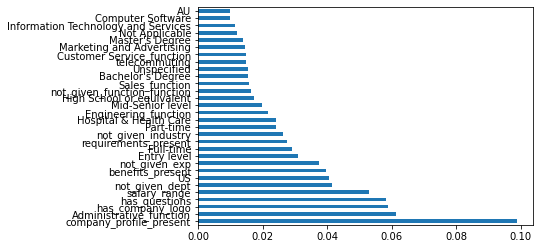

In [151]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.sort_values(ascending=False).nlargest(30).plot(kind='barh')

<AxesSubplot:>

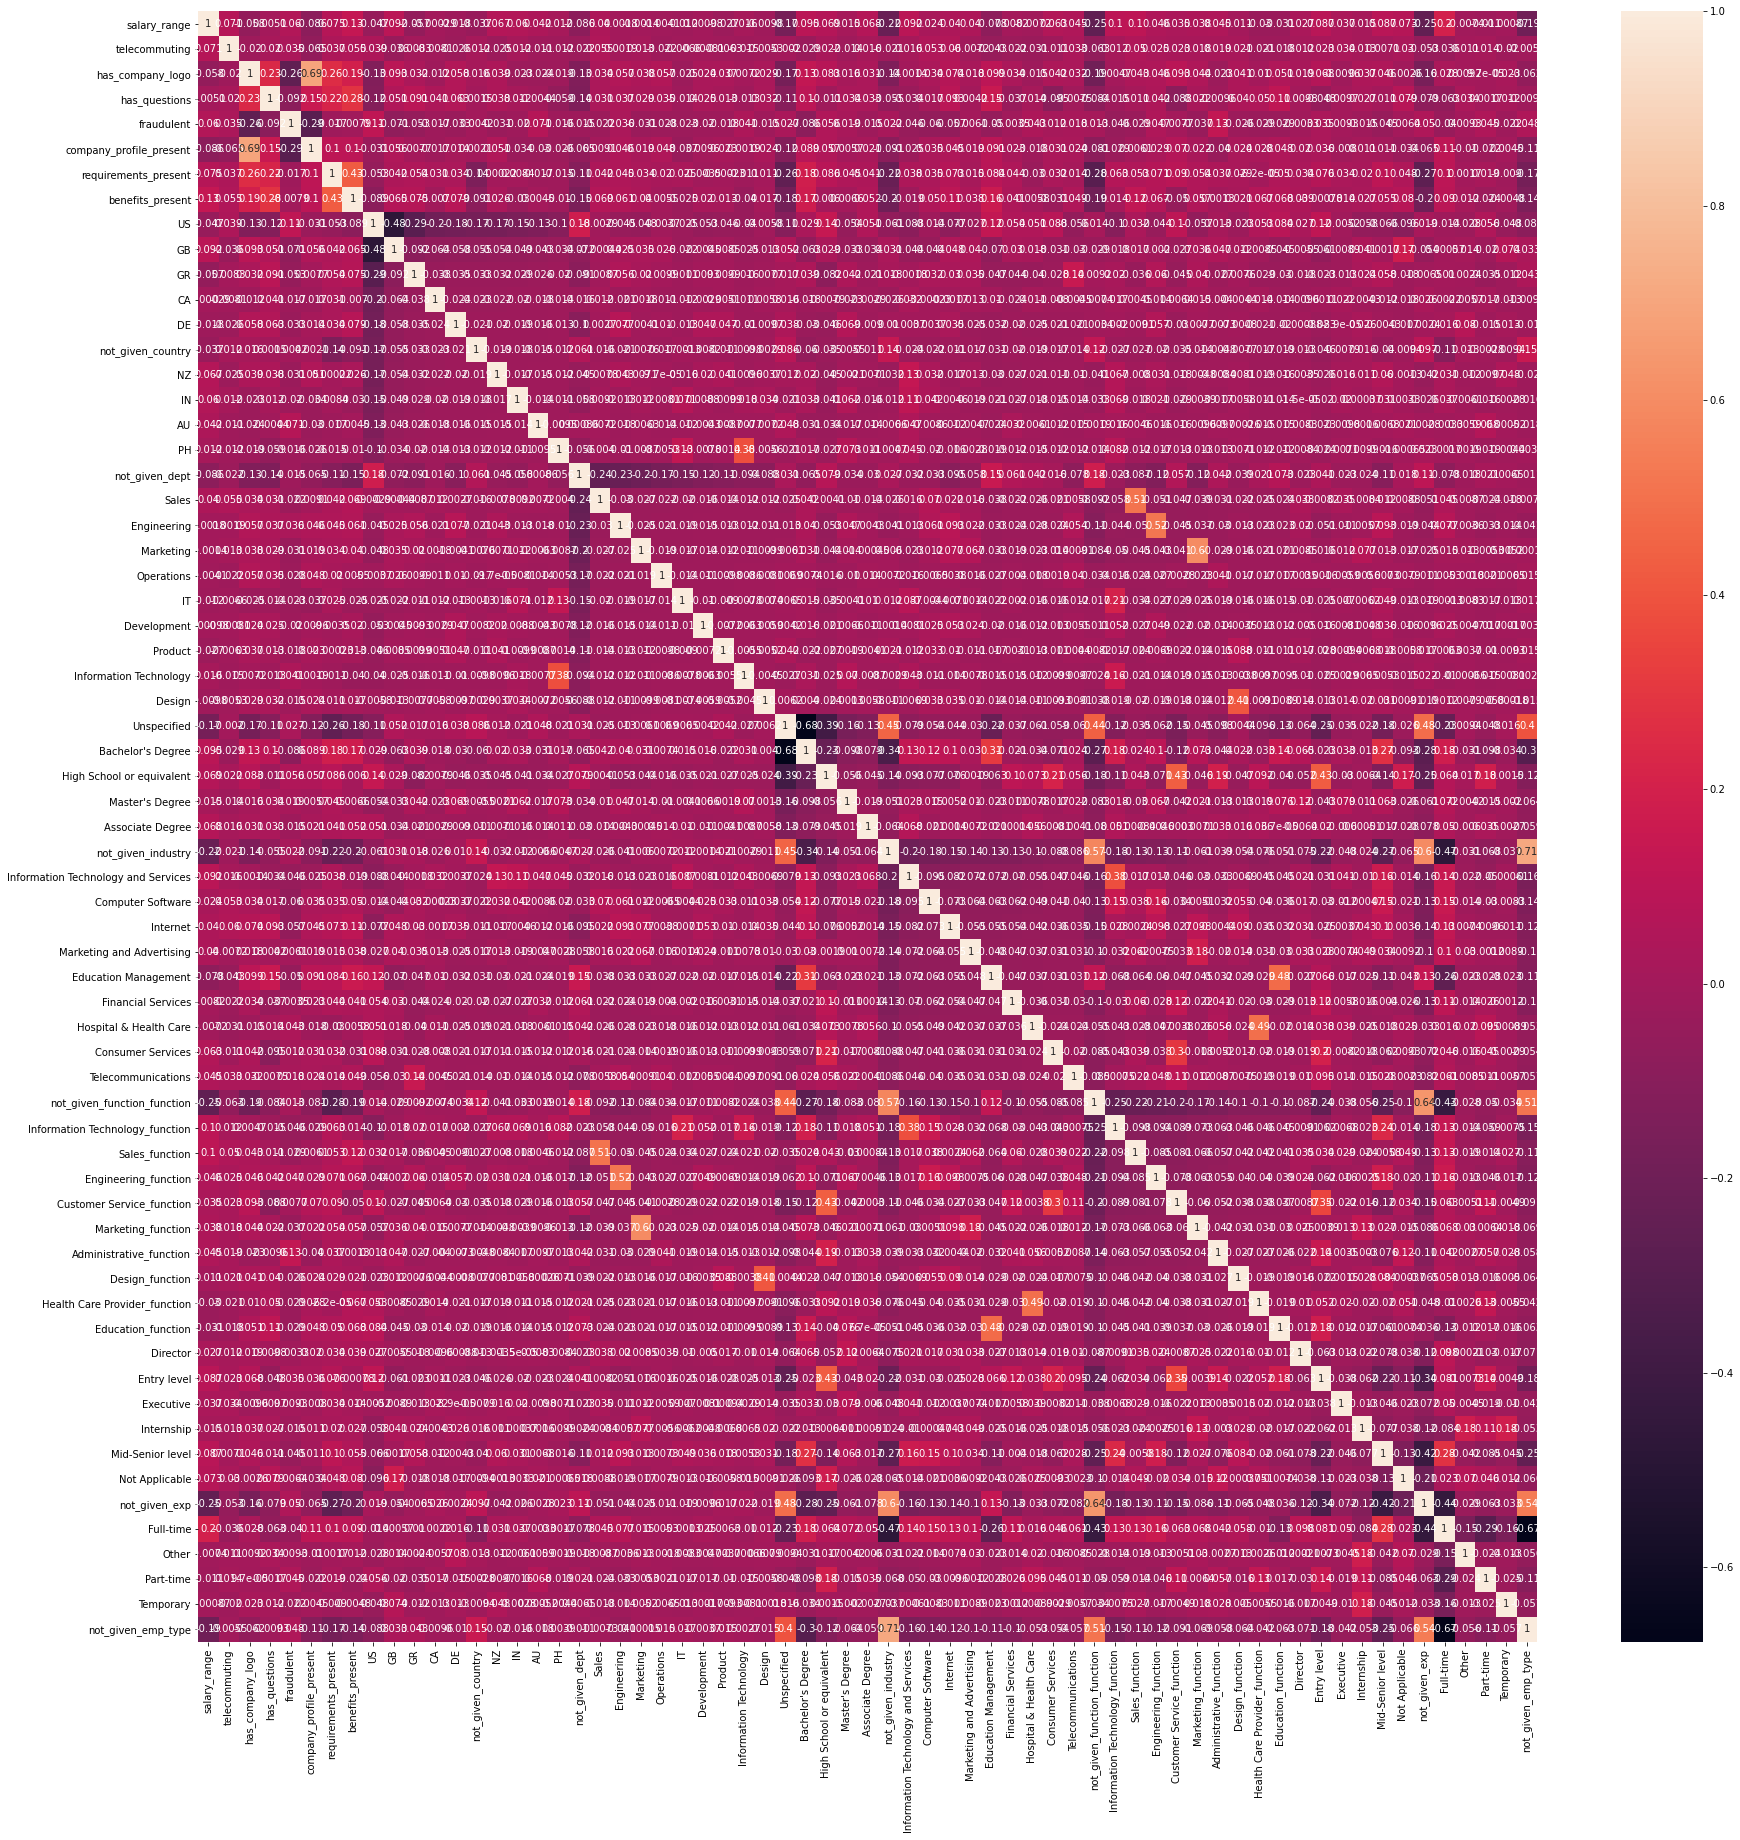

In [166]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

### Handling Imbalanced Dataset

In [153]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [154]:
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter


In [155]:
X=df.drop(['fraudulent','company_profile_present'],axis=1)
y=df['fraudulent']
smk = SMOTE(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [156]:
X_res.shape,y_res.shape

((34028, 63), (34028,))

In [157]:
print(Counter(y))
print(Counter(y_res))

Counter({0: 17014, 1: 866})
Counter({0: 17014, 1: 17014})


### Model Building

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=0)


In [159]:
from sklearn.ensemble import RandomForestClassifier


In [160]:
rf=RandomForestClassifier()

In [161]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [162]:
y_pred=rf.predict(X_test)

In [163]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9560681751395828

In [164]:
from sklearn import metrics

In [165]:
y_pred=rf.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(metrics.classification_report(y_test,y_pred)))

[[6323  436]
 [ 162 6691]]
Accuracy Score 0.9560681751395828
Classification report:               precision    recall  f1-score   support

           0       0.98      0.94      0.95      6759
           1       0.94      0.98      0.96      6853

    accuracy                           0.96     13612
   macro avg       0.96      0.96      0.96     13612
weighted avg       0.96      0.96      0.96     13612



In [ ]:
X_test.columns

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('jobs.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)


In [ ]:
X_test.head()